In [7]:
import pandas as pd
print(pd.__version__)


2.3.0


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Pivot: Only used on categorical columns.

In [2]:
df= sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Question: What is the total avg bill for each gender?
df.groupby('sex')['total_bill'].mean()

/var/folders/xw/_lnfz_x56cn_zn8_slshkwp80000gn/T/ipykernel_32590/1771901760.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['total_bill'].mean()


sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [4]:
# Question: What is the total avg bill for each gender and smoking (M smoking, M non-smoking , etc)?
df.groupby(['sex','smoker'])['total_bill'].mean()

/var/folders/xw/_lnfz_x56cn_zn8_slshkwp80000gn/T/ipykernel_32590/3912945094.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])['total_bill'].mean()


sex     smoker
Male    Yes       22.284500
        No        19.791237
Female  Yes       17.977879
        No        18.105185
Name: total_bill, dtype: float64

In [5]:
df.groupby(['sex','smoker'])['total_bill'].mean().unstack()

/var/folders/xw/_lnfz_x56cn_zn8_slshkwp80000gn/T/ipykernel_32590/2279680371.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])['total_bill'].mean().unstack()


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [6]:
# Instead we can use pivot function: 
df.pivot_table(index= 'sex', columns='smoker', values='total_bill')# default agg func is mean 

/var/folders/xw/_lnfz_x56cn_zn8_slshkwp80000gn/T/ipykernel_32590/2804646437.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index= 'sex', columns='smoker', values='total_bill')# default agg func is mean


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [7]:
df.pivot_table(index= 'sex', columns='smoker', values='total_bill', aggfunc='sum')

/var/folders/xw/_lnfz_x56cn_zn8_slshkwp80000gn/T/ipykernel_32590/2958963643.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index= 'sex', columns='smoker', values='total_bill', aggfunc='sum')


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [8]:
# What if I want to see all the columns 
df_1 = pd.concat([df[['sex', 'smoker']], df.select_dtypes(include='number')], axis=1)
print(df_1.pivot_table(index='sex', columns='smoker'))

# Say if we want to see only tips 
df_1.pivot_table(index='sex', columns='smoker')['tip']

df_1.pivot_table(index='sex', columns='smoker')['size']

            size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185


/var/folders/xw/_lnfz_x56cn_zn8_slshkwp80000gn/T/ipykernel_32590/2483043236.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  print(df_1.pivot_table(index='sex', columns='smoker'))
/var/folders/xw/_lnfz_x56cn_zn8_slshkwp80000gn/T/ipykernel_32590/2483043236.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_1.pivot_table(index='sex', columns='smoker')['tip']
/var/folders/xw/_lnfz_x56cn_zn8_slshkwp80000gn/T/ipykernel_32590/2483043236.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_1.pivot_tab

smoker,Yes,No
sex,,
Male,2.500000,2.711340
Female,2.242424,2.592593


In [10]:
# Multi dimension 

df1= df.pivot_table(index=['sex','smoker'], columns=['day','time'], values='total_bill')
df1

/var/folders/xw/_lnfz_x56cn_zn8_slshkwp80000gn/T/ipykernel_32590/3536476480.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df1= df.pivot_table(index=['sex','smoker'], columns=['day','time'], values='total_bill')


day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [11]:
# Male -> Smoker -> Friday -> Lunch
df1.loc[('Male','Yes'),('Fri','Lunch')]

np.float64(11.386666666666665)

In [12]:
# Multi indexing:
df2= df.pivot_table(index=['sex','smoker'], columns=['day','time'], aggfunc={'total_bill':'sum', 
                                                                        'size':'mean',
                                                                        'tip':'max'})

df2

/var/folders/xw/_lnfz_x56cn_zn8_slshkwp80000gn/T/ipykernel_32590/2821701165.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2= df.pivot_table(index=['sex','smoker'], columns=['day','time'], aggfunc={'total_bill':'sum',


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

### Practice: 

In [19]:
expense = pd.read_csv('/Users/vrunda/Library/CloudStorage/GoogleDrive-shahvrunda231296@gmail.com/.shortcut-targets-by-id/1If4Xq7JBYnZ3iRTOYUU8DDWlZlr7e5rJ/Dataset, Assignments, Interview Prep - D1/dataset/expense_data.csv')

In [20]:
expense.tail()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0
276,11/21/2021 13:30,CUB - online payment,Other,NaN,Got from gobi,2000.0,Income,NaN,2000.0,INR,2000.0


In [21]:
# Question: How many different categories do we have?
expense['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [22]:
expense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [23]:
expense['Date']= pd.to_datetime(expense['Date'], format= '%m/%d/%Y %H:%M')

In [24]:
expense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [25]:
# Extract Month from date 
expense['Month']= expense['Date'].dt.month_name()


In [26]:
expense.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [27]:
# Question: For which month for which category has we spent the most

expense.pivot_table(index= 'Month', columns= 'Category', values='Amount', aggfunc='sum', fill_value= 0) # fill_value will fill Nan to 0

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,5335.00,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0


<Axes: xlabel='Month'>

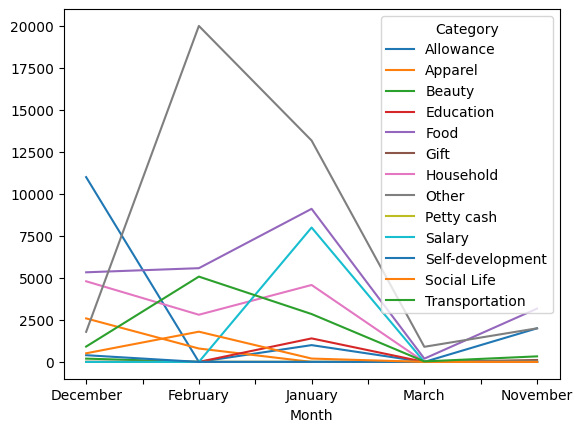

In [28]:
# One of the most beautifull part of pivot table is it will let you plot directly. 
expense.pivot_table(index= 'Month', columns= 'Category', values='Amount', aggfunc='sum', fill_value= 0) .plot()

In [29]:
expense.pivot_table(index= 'Month', columns= 'Income/Expense', values='Amount', aggfunc='sum', fill_value= 0)

Income/Expense,Expense,Income
Month,,
December,15228.72,12310.0
February,17864.65,18200.0
January,20679.51,19641.0
March,525.00,600.0
November,3620.40,4003.0


<Axes: xlabel='Month'>

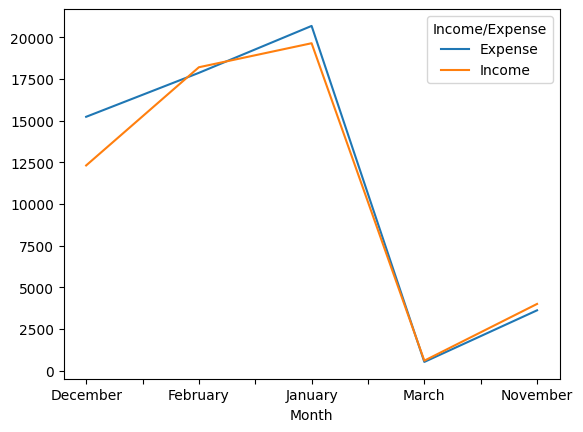

In [33]:
expense.pivot_table(index= 'Month', columns= 'Income/Expense', values='Amount', aggfunc='sum', fill_value= 0).plot()

<Axes: xlabel='Month'>

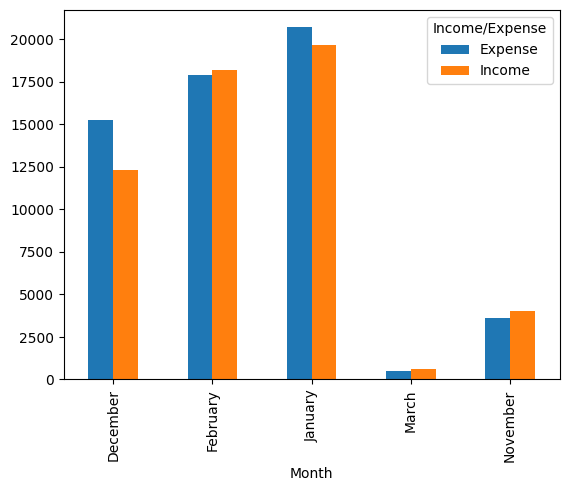

In [32]:
expense.pivot_table(index= 'Month', columns= 'Income/Expense', values='Amount', aggfunc='sum', fill_value= 0).plot(kind= 'bar')